In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2 as cv
import matplotlib.pyplot as plt
from keras.applications import vgg16
from keras.models import Model,load_model
import keras
from keras.layers import Input, Conv2D, Conv2DTranspose,AveragePooling2D, MaxPooling2D,UpSampling2D,LeakyReLU, concatenate, Dropout,BatchNormalization,Activation
from keras.callbacks import EarlyStopping,ModelCheckpoint
import pandas as pd
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from numpy.random import seed
seed(123)
import tensorflow.compat.v1 as tf
tf.set_random_seed(123)
# from keras import backend as K
# session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
# sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
# K.set_session(sess)
#print(os.listdir("../input/"))
InputPath = "./data/train/"

In [9]:
print(os.listdir(InputPath))

['.DS_Store', 'label', 'img']


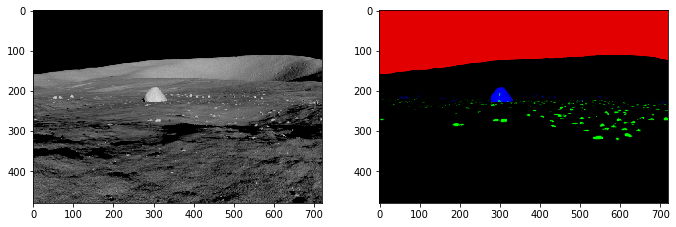

In [12]:
plt.figure(figsize=(30,30))
plt.subplot(5,5,1)
img = cv.imread(InputPath+"img/render0001.png")  
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.subplot(5,5,1+1)
img = cv.imread(InputPath+"label/ground0001.png")  
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
#plt.subplot(5,5,1+2)
# img = cv.imread(InputPath+"clean/clean0001.png")  
# img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
#plt.imshow(img)

In [13]:
def ExtractData(InputPath):
    SourceImg = sorted(os.listdir(InputPath+'img'))
    TargetImg = sorted(os.listdir(InputPath+'label'))
    X_=[]
    y_=[]
    count=0
    for i in range(len(SourceImg)):
        if count<2165:
            count=count+1
            img_1 = cv.imread(InputPath + 'img/'+SourceImg[i])
            img_1 = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)
            img_1 = cv.resize(img_1,(500,500))
            X_.append(img_1)
            img_2 = cv.imread(InputPath + 'label/'+TargetImg[i])
            img_2 = cv.cvtColor(img_2, cv.COLOR_BGR2RGB)
            img_2 = cv.resize(img_2,(500,500))
            y_.append(img_2)
    X_ = np.array(X_)
    y_ = np.array(y_)
    
    return X_,y_

In [14]:
X_,y_ = ExtractData(InputPath)

In [16]:
X_.shape, y_.shape

((999, 500, 500, 3), (999, 500, 500, 3))

In [5]:
train_generator()

<generator object train_generator at 0x13a0c0468>

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

import torch
from torch.autograd import Variable
from __future__ import print_function
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data.dataset import Dataset
import torch.optim as optim
from torch.nn import init
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import save_image

In [ ]:
import os
import tensorflow as tf
import numpy as np
import scipy
import cv2
from tensorflow.keras.callbacks import TensorBoard

from model import MyModel
from dataload import handle_data
from config import num_epochs, learning_rate, batch_size, weight_path, image_shape, train_dir
from dataload import train_generator
from deeplab import DeepLabV3Plus

tensorboard = tf.keras.callbacks.TensorBoard(
    log_dir='logs/{}'.format("demo"),
    histogram_freq=1, batch_size=32,
    write_graph=True, write_grads=False, write_images=True,
    embeddings_freq=0, embeddings_layer_names=None,
    embeddings_metadata=None, embeddings_data=None, update_freq=500
)

# 生成检查点，可以每一轮保存一次参数， 不用训练完再保存
checkpoint = tf.keras.callbacks.ModelCheckpoint(weight_path+'fcn_20191021.ckpt',monitor='loss', 
                                                    save_weights_only=True,verbose=1,
                                                    save_best_only=True,save_freq='epoch',mode = 'min')
                                                    

# 生成训练数据集
train_list_dir = os.listdir(train_dir)
train_dataset = tf.data.Dataset.from_generator(
    train_generator, (tf.float32, tf.float32), 
    (tf.TensorShape([None, None, None]), tf.TensorShape([None, None, None])))

train_dataset = train_dataset.shuffle(buffer_size=len(train_list_dir))
train_dataset = train_dataset.batch(batch_size)

model = DeepLabV3Plus(image_shape[0], image_shape[1], nclasses=4)
#model = MyModel(3)
# model.load_weights(weight_path+'fcn_20191021')

optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, decay=0.0001)
model.compile(
    optimizer=optimizer,
    loss=tf.compat.v2.nn.softmax_cross_entropy_with_logits,
    metrics=['accuracy']
)
model.fit(train_dataset, epochs=num_epochs, callbacks=[tensorboard, checkpoint])
#model.summary()

W0220 16:14:12.599707 4707648960 callbacks.py:1504] `batch_size` is no longer needed in the `TensorBoard` Callback and will be ignored in TensorFlow 2.0.


*** Building DeepLabv3Plus Network ***
*** Output_Shape => (None, 480, 720, 4) ***
Epoch 1/50


In [ ]:
train_dataset